In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset

In [ ]:
# dataset = load_dataset('chiayewken/flan-v2')

Resolving data files:   0%|          | 0/89 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/23173509 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/89 [00:00<?, ?it/s]

In [ ]:
from datasets import load_dataset

# Load the 'train' and 'test' splits, concatenated together
# dataset = load_dataset('chiayewken/flan-v2')


Resolving data files:   0%|          | 0/89 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/89 [00:00<?, ?it/s]

In [ ]:
# from tqdm import tqdm

# segment_idx = {}
# idx = 0
# for ds in tqdm(dataset['train']):
#   if ds['task_source'] not in segment_idx:
#     segment_idx[ds['task_source']] = []
#   segment_idx[ds['task_source']].append(idx)
#   idx += 1

100%|██████████| 23173509/23173509 [32:55<00:00, 11731.09it/s]


In [ ]:
segment_idx.keys()

dict_keys(['CoT', 'Flan2021', 'NIv2', 'P3'])

In [ ]:
# import json

# with open("segment_idx.json", "w") as outfile:
#     json.dump(segment_idx, outfile)


In [ ]:
for k, v in segment_idx.items():
  print(k, len(v))

CoT 183848
Flan2021 4755666
NIv2 10066896
P3 8167099


In [ ]:
cot_ds  = dataset['train'].select(segment_idx['CoT'])
# niv2_ds = dataset.select(segment_idx['niv2'])
# flan_ds = dataset.select(segment_idx['flan'])

In [ ]:
segment_idx['CoT']

In [ ]:
import random

In [ ]:
res = random.choices(segment_idx['NIv2'], k=1006689)
res1 = random.choices(segment_idx['Flan2021'], k=475566)
res2 = random.choices(segment_idx['P3'], k=816709)


In [ ]:
niv2_ds = dataset['train'].select(res)
flan_ds = dataset['train'].select(res1)
p3 =dataset['train'].select(res2)

In [ ]:
from datasets import concatenate_datasets

dataset_ = concatenate_datasets([cot_ds,niv2_ds,flan_ds ,p3])

In [ ]:
dataset_

Dataset({
    features: ['source', 'target', 'task_name', 'task_source', 'template_type', 'template_idx'],
    num_rows: 2482812
})

In [ ]:
# dataset_.push_to_hub("shubhankarAI/akaroo_dataset")

In [ ]:
dataset_ = load_dataset('shubhankarAI/akaroo_dataset')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/2482812 [00:00<?, ? examples/s]

In [ ]:
!pip install accelerate bitsandbytes

In [ ]:
from transformers import LlamaForCausalLM, LlamaTokenizer

tokenizer = LlamaTokenizer.from_pretrained('llama2-tokeniser')
#model = LlamaForCausalLM.from_pretrained("/output/path")

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama.LlamaTokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [ ]:
def remove_short_targets(sample):
  global tokenizer
  tokens = tokenizer.tokenize(sample['target'])
  return len(tokens) > 100

In [ ]:
filtered_ds = dataset_['train'].filter(lambda sample: remove_short_targets(sample))

Filter:   0%|          | 0/2482812 [00:00<?, ? examples/s]

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) y
Token is valid (permission: fineGrained).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your termin

In [ ]:
filtered_ds.push_to_hub("shubhankarAI/akaroo_filtered_ds")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/121 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/shubhankarAI/akaroo_filtered_ds/commit/95ac7abaaf36a77505c722dc846a0c9be62b8984', commit_message='Upload dataset', commit_description='', oid='95ac7abaaf36a77505c722dc846a0c9be62b8984', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
import pandas as pd
df = filtered_ds.to_pandas()

In [ ]:
df

,source,target,task_name,task_source,template_type,template_idx
0,Question: A housewife goes to the market. She ...,"Since there are 7 months from January to July,...",cot_gsm8k,CoT,fs_opt,2
1,Q: The Lone Ranger is an American western dram...,"in Japan on October 10 , 2013 , in Europe on F...",stream_qed,CoT,fs_opt,5
2,Q: Caprice is taking piano lessons. Her mother...,The total cost for roses is 20 * 5 = $100. Nad...,cot_gsm8k,CoT,fs_opt,0
3,The average amount with a group of seven numbe...,Total members in the group = 7\nAverage amount...,stream_aqua,CoT,zs_opt,5
4,Student A:Context: The line For fools rush in ...,OK... The important part for answering this qu...,stream_qed,CoT,fs_opt,2
...,...,...,...,...,...,...
120916,What key details about raymond seopa can be e...,- caps is 85- position is striker- nationalcap...,wiki_bio_key_content,P3,zs_opt,2
120917,Please answer the following question: What key...,- weight is 190 lb kg on- trainer is earl hebn...,wiki_bio_key_content,P3,zs_noopt,9
120918,[Q]: Build a movie plot around this: What does...,"Despite its epic scale, the Moses story takes ...",duorc_ParaphraseRC_build_story_around_qa,P3,fs_opt,6
120919,[Q]: Build a movie plot around this: What were...,"In 2019, humans have genetically engineered Re...",duorc_ParaphraseRC_build_story_around_qa,P3,fs_opt,6


In [ ]:
!pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer, AutoModel
model = SentenceTransformer('thenlper/gte-base')


modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/68.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/618 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/219M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# @title Embedding all the Target responses using gte-base

# from tqdm import tqdm

# embeddings = []
# for text in tqdm(df['target']):
#   embeddings.append(model.encode(text))

100%|██████████| 120921/120921 [36:47<00:00, 54.79it/s]


In [ ]:
import joblib
import numpy as np

In [ ]:
embeddings = joblib.load('drive/MyDrive/embeddings.joblib')
embeddings = np.vstack(embeddings)


In [ ]:
!pip install faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 16.7 MB/s eta 0:00:00


In [ ]:
import faiss
from collections import defaultdict
from tqdm import tqdm
index_flat = faiss.IndexFlatIP(768)
index_flat.add(embeddings)

In [ ]:

chunks_150 = np.array_split(embeddings, 120)

In [ ]:
remove_ids = defaultdict(int)

for chunk in tqdm(chunks_150):
  D, I  = index_flat.search(chunk,5)
  for i in range(D.shape[0]):
    dists = D[i]
    dists = dists > 0.95
    sim_ids = I[i][dists]
    for idx in sim_ids:
      if idx !=i :
        remove_ids[idx] += 1

100%|██████████| 120/120 [09:25<00:00,  4.72s/it]


In [ ]:
joblib.dump(remove_ids, 'drive/MyDrive/remove_ids.joblib')

['drive/MyDrive/remove_ids.joblib']

In [ ]:
len(remove_ids)

115113

In [ ]:
filtered_dataset_id = "shubhankarAI/akaroo_filtered_ds"

In [ ]:
import datasets
ds = datasets.load_dataset(filtered_dataset_id)

In [ ]:
!pip install datasets

In [ ]:
bad_idx = list(remove_ids.keys())

In [ ]:
all_idx = set(list(range(len(ds['train']))))
good_idx = all_idx - set(bad_idx)

In [ ]:
dedup_ds = ds['train'].select(good_idx)

In [ ]:
dedup_ds

,source,target,task_name,task_source,template_type,template_idx
0,My question is: Henry took 9 pills a day for 1...,There were 9 - 4 = 5 other pills. Each of the ...,cot_gsm8k,CoT,zs_opt,8
1,"Given the task definition and input, reply wit...",ບໍ່ມີການລະບຸແນ່ນອນວ່່າ ການຕັດສິນໃຈຈະເກິດຂື້ນເມ...,task1124_alt_ja_lo_translation,NIv2,zs_opt,5
2,Stream of consciousness rationale: The importa...,"Q: In 1996, Funimation Productions licensed Dr...",stream_qed_ii,CoT,zs_opt,14
3,Creatively image a question and justification ...,"The question is: Can we conclude from ""A man l...",cot_esnli_ii,CoT,zs_opt,9
4,"Q: Passage: Mono no aware (物 の 哀れ), literally ...",The important part for answering this question...,stream_qed,CoT,zs_opt,3
...,...,...,...,...,...,...
5901,"Teacher: In this task, you are given a sentenc...",બે શૌચાલય ઘણા સુશોભન સાથે યાર્ડ પાસેના પેવમેન્...,task438_eng_guj_parallel_corpus_en_gu_translation,NIv2,fs_opt,2
5902,Definition: A text is given in English. Transl...,కానీ ఇప్పుడు భార‌త‌దేశం 6వ‌ స్థానాని కి చేరుకు...,task1047_pib_translation_english_telugu,NIv2,zs_opt,2
5903,A text is given in Hindi. Translate it from th...,వారి దైనందిన జీవనం తాలూకు వివిధ అంశాల‌పై మాట్ల...,task1045_pib_translation_hindi_telugu,NIv2,fs_opt,7
5904,"Given the task definition, example input & out...",ୟୁନିକ ଆଇଡେଣ୍ଟିଫିକେସନ ଅଥରିଟୀ ଅଫ ଇଣ୍ଡିଆ ଫଣ୍ଡର ସ୍...,task997_pib_translation_bengali_oriya,NIv2,fs_opt,1


In [ ]:
dedup_ds.push_to_hub("shubhankarAI/dedup_ds")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/6 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/shubhankarAI/dedup_ds/commit/79658a557429d55b0fc5c248ae64325dac529383', commit_message='Upload dataset', commit_description='', oid='79658a557429d55b0fc5c248ae64325dac529383', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
dedup_ds

Dataset({
    features: ['source', 'target', 'task_name', 'task_source', 'template_type', 'template_idx'],
    num_rows: 5906
})

In [ ]:
from datasets import load_dataset


dataset_name = 'shubhankarAI/dedup_ds'
dataset = load_dataset(dataset_name, split="train")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


## Loading the model

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig, AutoTokenizer

model_name = "TinyPixel/Llama-2-7B-bf16-sharded"

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16,
)

model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    trust_remote_code=True
)
model.config.use_cache = False

`low_cpu_mem_usage` was None, now set to True since model is quantized.


Loading checkpoint shards:   0%|          | 0/14 [00:00<?, ?it/s]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [ ]:
from peft import LoraConfig, get_peft_model

lora_alpha = 16
lora_dropout = 0.1
lora_r = 64

peft_config = LoraConfig(
    lora_alpha=lora_alpha,
    lora_dropout=lora_dropout,
    r=lora_r,
    bias="none",
    task_type="CAUSAL_LM"
)

## Loading the trainer

In [ ]:
from transformers import TrainingArguments

output_dir = "./results"
per_device_train_batch_size = 1
gradient_accumulation_steps = 4
optim = "paged_adamw_32bit"
save_steps = 100
logging_steps = 10
learning_rate = 2e-4
max_grad_norm = 0.3
max_steps = 500
warmup_ratio = 0.03
lr_scheduler_type = "constant"

training_arguments = TrainingArguments(
    output_dir=output_dir,
    per_device_train_batch_size=per_device_train_batch_size,
    gradient_accumulation_steps=gradient_accumulation_steps,
    optim=optim,
    save_steps=save_steps,
    logging_steps=logging_steps,
    learning_rate=learning_rate,
    fp16=True,
    max_grad_norm=max_grad_norm,
    max_steps=max_steps,
    warmup_ratio=warmup_ratio,
    group_by_length=True,
    lr_scheduler_type=lr_scheduler_type,
)

In [ ]:
df = dataset.to_pandas()

In [ ]:
df = df.rename(columns={'source': 'prompt', 'target': 'response'})
df = df[['prompt', 'response']]

In [ ]:
# prompt: generate dataset from pandas

from datasets import Dataset

dataset_ = Dataset.from_pandas(df)


In [ ]:
from trl import SFTTrainer
from transformers import TrainingArguments
from peft import LoraConfig, get_peft_model


Then finally pass everthing to the trainer

In [ ]:
from trl import SFTTrainer

max_seq_length = 512

trainer = SFTTrainer(
    model=model,
    train_dataset=dataset_,
    peft_config=peft_config,
    dataset_text_field="response",
    max_seq_length=max_seq_length,
    tokenizer=tokenizer,
    args=training_arguments,
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_deprecation.py:100: FutureWarning: Deprecated argument(s) used in '__init__': dataset_text_field, max_seq_length. Will not be supported from version '1.0.0'.

Deprecated positional argument(s) used in SFTTrainer, please use the SFTConfig to set these arguments instead.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1965: FutureWarning: `--push_to_hub_token` is deprecated and will be removed in version 5 of 🤗 Transformers. Use `--hub_token` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1965: FutureWarning: `--push_to_hub_token` is deprecated and will be removed in version 5 of 🤗 Transformers. Use `--hub_token` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:269: UserWarning: You passed a `max_seq_length` argument to the SFTTrainer, the value you passed will override the

Map:   0%|          | 0/5906 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:397: UserWarning: You passed a tokenizer with `padding_side` not equal to `right` to the SFTTrainer. This might lead to some unexpected behaviour due to overflow issues when training a model in half-precision. You might consider adding `tokenizer.padding_side = 'right'` to your code.
  warnings.warn(
max_steps is given, it will override any value given in num_train_epochs


We will also pre-process the model by upcasting the layer norms in float 32 for more stable training

In [ ]:
for name, module in trainer.model.named_modules():
    if "norm" in name:
        module = module.to(torch.float32)

## Train the model

Now let's train the model! Simply call `trainer.train()`

In [ ]:
trainer.train()

Step,Training Loss
10,1.388800
20,0.899000
30,0.988800
40,0.970200
50,1.205300
60,1.527800
70,0.804400
80,0.845700
90,0.843200
100,1.081600


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in

TrainOutput(global_step=500, training_loss=1.0347670669555664, metrics={'train_runtime': 2202.5971, 'train_samples_per_second': 0.908, 'train_steps_per_second': 0.227, 'total_flos': 1.995951128277811e+16, 'train_loss': 1.0347670669555664, 'epoch': 0.3386386725364037})

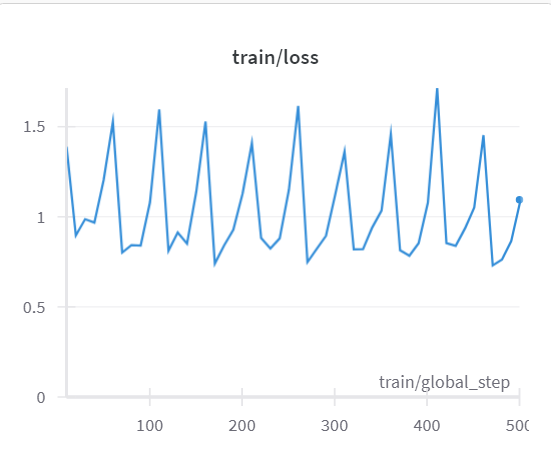



The `SFTTrainer` also takes care of properly saving only the adapters during training instead of saving the entire model.

In [ ]:
model_to_save = trainer.model.module if hasattr(trainer.model, 'module') else trainer.model  # Take care of distributed/parallel training
model_to_save.save_pretrained("outputs")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) y
Token is valid (permission: fineGrained).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your termin

In [ ]:
lora_config = LoraConfig.from_pretrained('outputs')
model = get_peft_model(model, lora_config)

In [ ]:
model.push_to_hub('shubhankarAI/llma2')

adapter_model.safetensors:   0%|          | 0.00/134M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/shubhankarAI/llma2/commit/6e58e33bc44c6f545ce7a64f5a960f7af5c0f1ac', commit_message='Upload model', commit_description='', oid='6e58e33bc44c6f545ce7a64f5a960f7af5c0f1ac', pr_url=None, pr_revision=None, pr_num=None)